# Library

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline
plt.style.use('seaborn')

#view all columns
pd.options.display.max_columns = None
#.2f
pd.options.display.float_format = '{:.4f}'.format

import warnings
warnings.filterwarnings('ignore')

#sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold, train_test_split

#metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#feature_engine

#pycaret

# Load

In [100]:
train = pd.read_csv("./data/drive-download-20220502T013044Z-001/train.csv")
test = pd.read_csv("./data/drive-download-20220502T013044Z-001/test.csv")
sample_submission = pd.read_csv("./data/drive-download-20220502T013044Z-001/sample_submission.csv")

#drop id column
train.drop(['id'],axis=1,inplace=True)
test.drop(['id'],axis=1,inplace=True)

# variables

* Year_Birth : 고객 생년월일
* Education : 고객 학력
* Marital_status : 고객 결혼 상태
* Income : 고객 연간 가구 소득
* Kidhome : 고객 가구의 자녀 수
* Teenhome : 고객 가구의 청소년 수
* Dt_Customer : 고객이 회사에 등록한 날짜
* Recency : 고객의 마지막 구매 이후 일수
* NumDealsPurchases : 할인된 구매 횟수
* NumWebPurchases : 회사 웹사이트를 통한 구매 건수
* NumCatalogPurchases : 카탈로그를 사용한 구매 수 
* NumStorePuchases : 매장에서 직접 구매한 횟수
* NumWebVisitsMonth : 지난 달 회사 웹사이트 방문 횟수
* AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
* AcceptedCmp2: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
* AcceptedCmp3: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
* AcceptedCmp4: 고객이 네 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
* AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
* Complain : 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0
* Response : 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
* target : 고객의 제품 총 소비량

In [3]:
train.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,1974,Master,Together,46014.0000,1,1,21-01-2013,21,10,7,1,8,7,0,0,0,0,0,0,0,541
1,1962,Graduation,Single,76624.0000,0,1,24-05-2014,68,1,5,10,7,1,1,0,0,0,0,0,0,899
2,1951,Graduation,Married,75903.0000,0,1,08-04-2013,50,2,6,6,9,3,0,0,0,0,0,0,0,901
3,1974,Basic,Married,18393.0000,1,0,29-03-2014,2,2,3,0,3,8,0,0,0,0,0,0,0,50
4,1946,PhD,Together,64014.0000,2,1,10-06-2014,56,7,8,2,5,7,0,0,0,1,0,0,0,444


In [4]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1108 non-null   int64  
 1   Education            1108 non-null   object 
 2   Marital_Status       1108 non-null   object 
 3   Income               1108 non-null   float64
 4   Kidhome              1108 non-null   int64  
 5   Teenhome             1108 non-null   int64  
 6   Dt_Customer          1108 non-null   object 
 7   Recency              1108 non-null   int64  
 8   NumDealsPurchases    1108 non-null   int64  
 9   NumWebPurchases      1108 non-null   int64  
 10  NumCatalogPurchases  1108 non-null   int64  
 11  NumStorePurchases    1108 non-null   int64  
 12  NumWebVisitsMonth    1108 non-null   int64  
 13  AcceptedCmp3         1108 non-null   int64  
 14  AcceptedCmp4         1108 non-null   int64  
 15  AcceptedCmp5         1108 non-null   i

In [5]:
train.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
target                 0
dtype: int64

In [6]:
test.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [7]:
train.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
count,1108.0000,1108.0000,1108.0000,1108.0000,1108.0000,1108.0000,1108.0000,1108.0000,1108.0000,1108.0000,1108.0000,1108.0000,1108.0000,1108.0000,1108.0000,1108.0000,1108.0000,1108.0000
mean,1968.7013,52075.8096,0.4296,0.5117,50.1561,2.3394,4.1841,2.6904,5.9052,5.3484,0.0695,0.0857,0.0722,0.0686,0.0153,0.0090,0.1417,617.1218
std,12.2254,21310.0934,0.5456,0.5516,29.0856,1.9433,2.8106,2.7922,3.3068,2.4051,0.2544,0.2801,0.2589,0.2529,0.1230,0.0946,0.3489,603.5880
min,1893.0000,1730.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000
25%,1959.0000,35768.5000,0.0000,0.0000,25.0000,1.0000,2.0000,0.0000,3.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,70.7500
50%,1970.0000,51609.5000,0.0000,0.0000,51.0000,2.0000,4.0000,2.0000,5.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,412.0000
75%,1977.0000,68325.0000,1.0000,1.0000,76.0000,3.0000,6.0000,4.0000,8.0000,7.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1068.7500
max,1996.0000,162397.0000,2.0000,2.0000,99.0000,15.0000,27.0000,11.0000,13.0000,20.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2525.0000


**Observation**

* target 변수를 보니 모든 고객은 최소 하나는 구매했음.

In [8]:
len(train[train.duplicated()])

58

# Viz

In [101]:
num_cols = train.select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols = train.select_dtypes(exclude=['float64','int64']).columns.tolist()
num_cols.remove('target')

<AxesSubplot:>

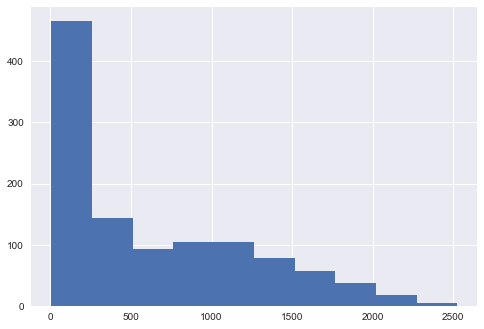

In [53]:
train['target'].hist()

<Figure size 576x396 with 0 Axes>

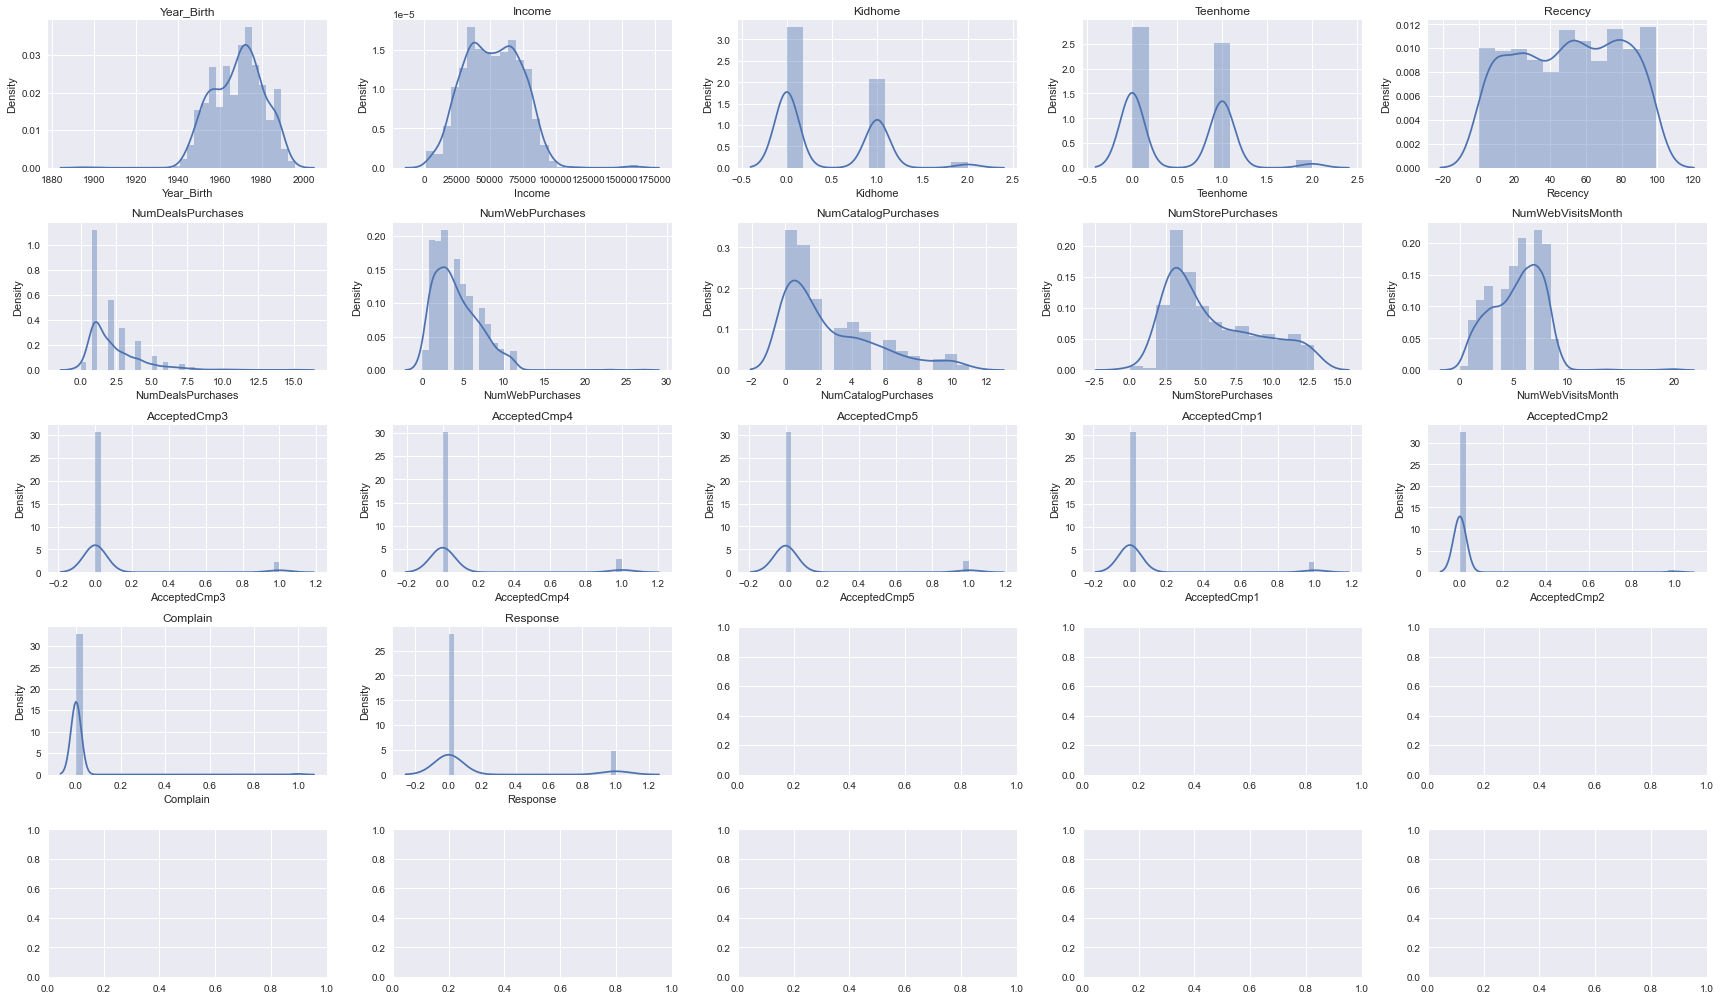

In [48]:
def show_dist_plot(df, columns):
    i = 0 
    plt.figure()
    plt.subplots(5,5,figsize=(24,14))
    for column in columns:
        i+=1
        plt.subplot(5,5,i)
        sns.distplot(df[column])
        plt.title(f'{column}')
    plt.tight_layout()
    
show_dist_plot(train,num_cols)

**Observation**

* 정규화 필요

<Figure size 576x396 with 0 Axes>

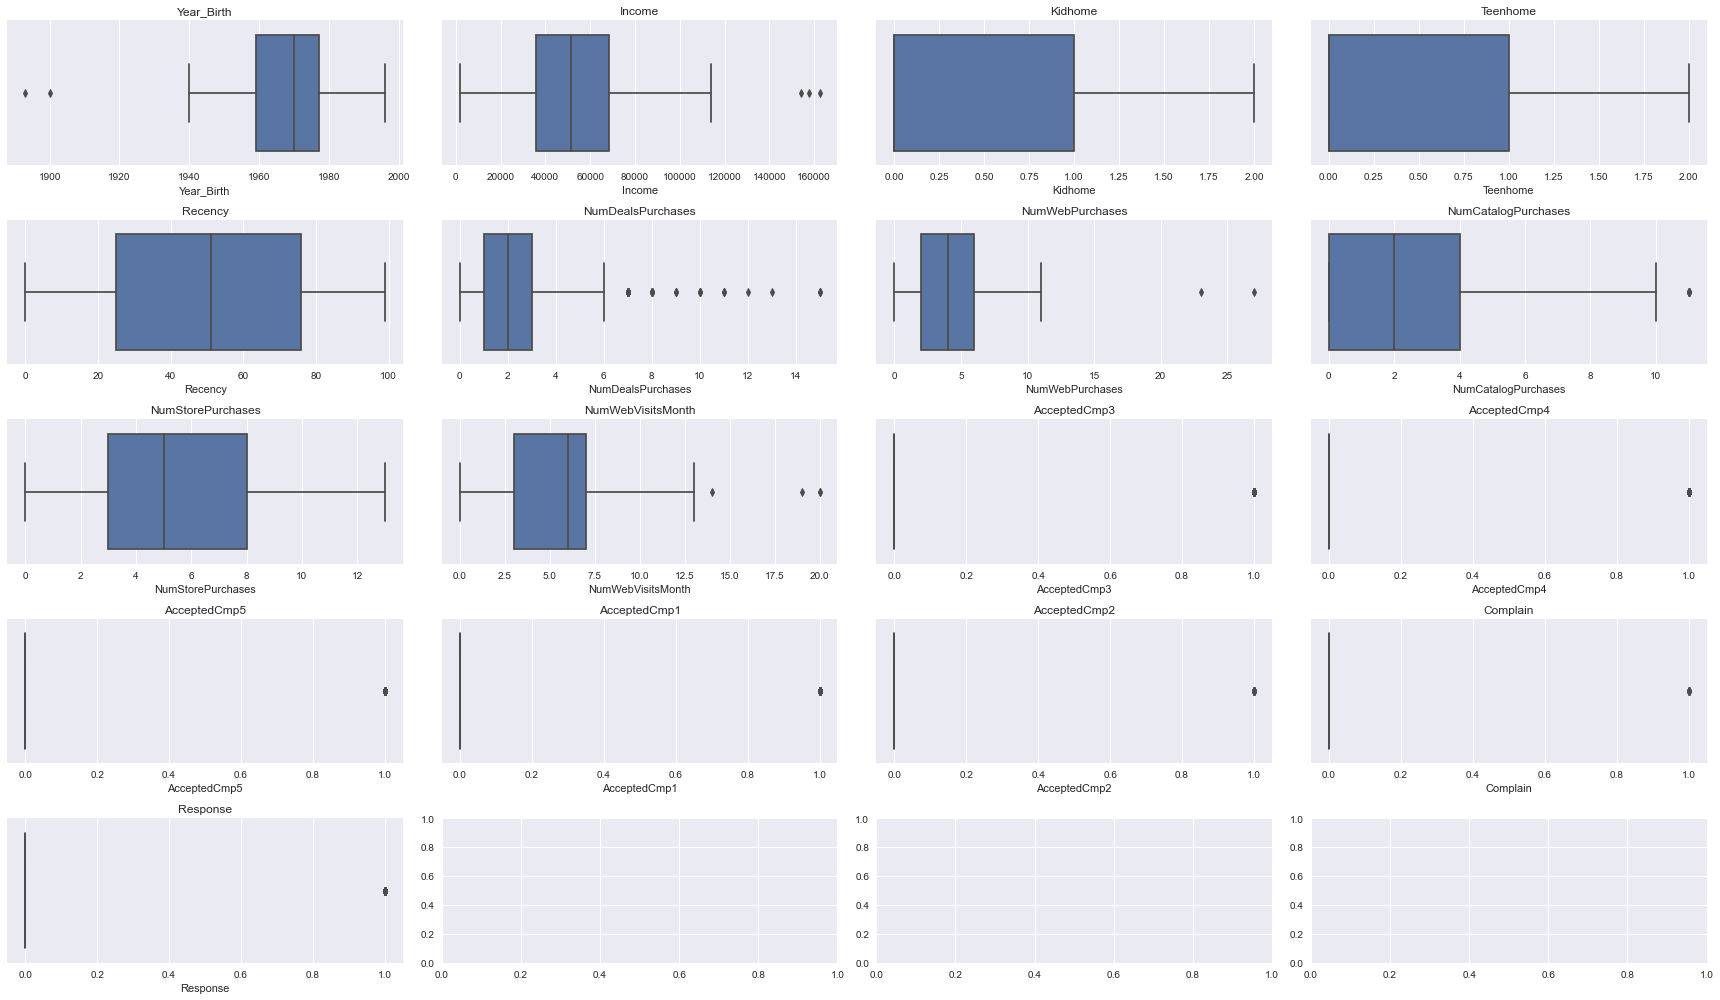

In [35]:
def show_dist_plot(df, columns):
    i = 0 
    plt.figure()
    plt.subplots(5,4,figsize=(24,14))
    for column in columns:
        i+=1
        plt.subplot(5,4,i)
        sns.boxplot(df[column])
        plt.title(f'{column}')
    plt.tight_layout()
    
show_dist_plot(train,num_cols)

**Observation**

* Year_Birth, income에 이상치가 있음.
* Num* 변수들에 정규화 필요함.

<Figure size 576x396 with 0 Axes>

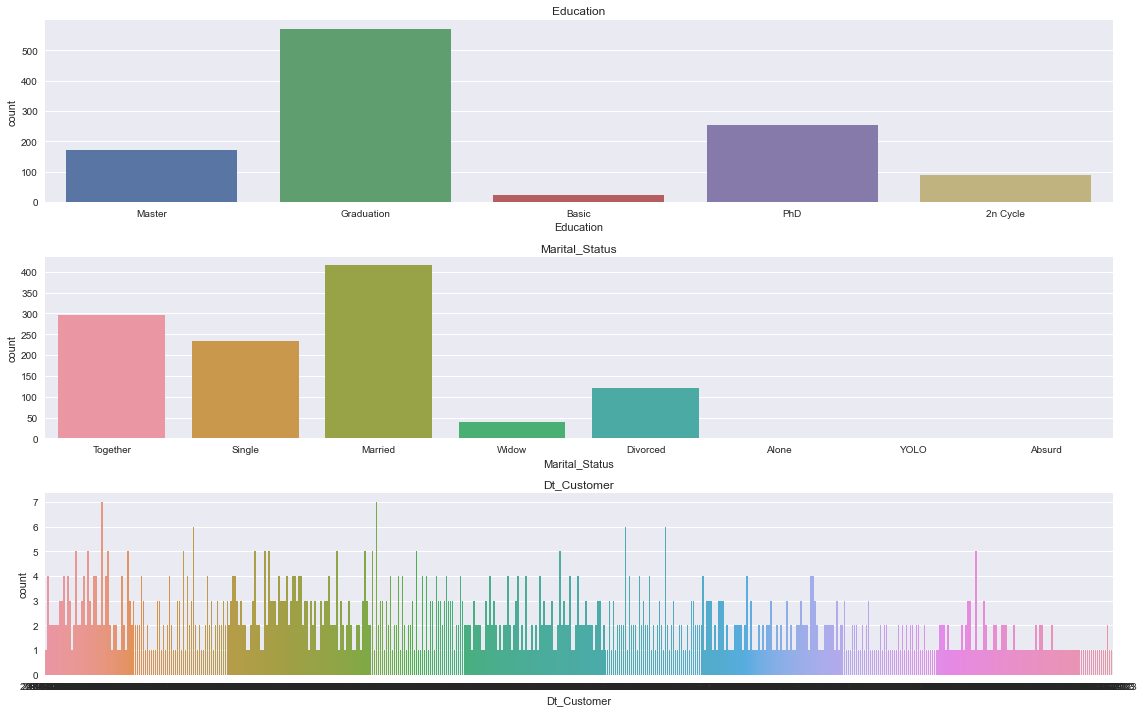

In [13]:
def show_count_plot(df, columns):
    i = 0 
    plt.figure()
    plt.subplots(3,1,figsize=(16,10))
    for column in columns:
        i+=1
        plt.subplot(3,1,i)
        sns.countplot(df[column])
        plt.title(f'{column}')
    plt.tight_layout()
    
show_count_plot(train,cat_cols)

In [14]:
train['Marital_Status'].value_counts()

Married     415
Together    296
Single      234
Divorced    120
Widow        39
Alone         2
YOLO          1
Absurd        1
Name: Marital_Status, dtype: int64

**Observation**

* Martial_Status 내 single 클래스에 Widow, Divorced, YOLO, Alone, Absurd 를 합쳐보자.
* Dt_Customer -> year feature 생성할 필요 있음.


## target과 각 변수간의 관계

<Figure size 576x396 with 0 Axes>

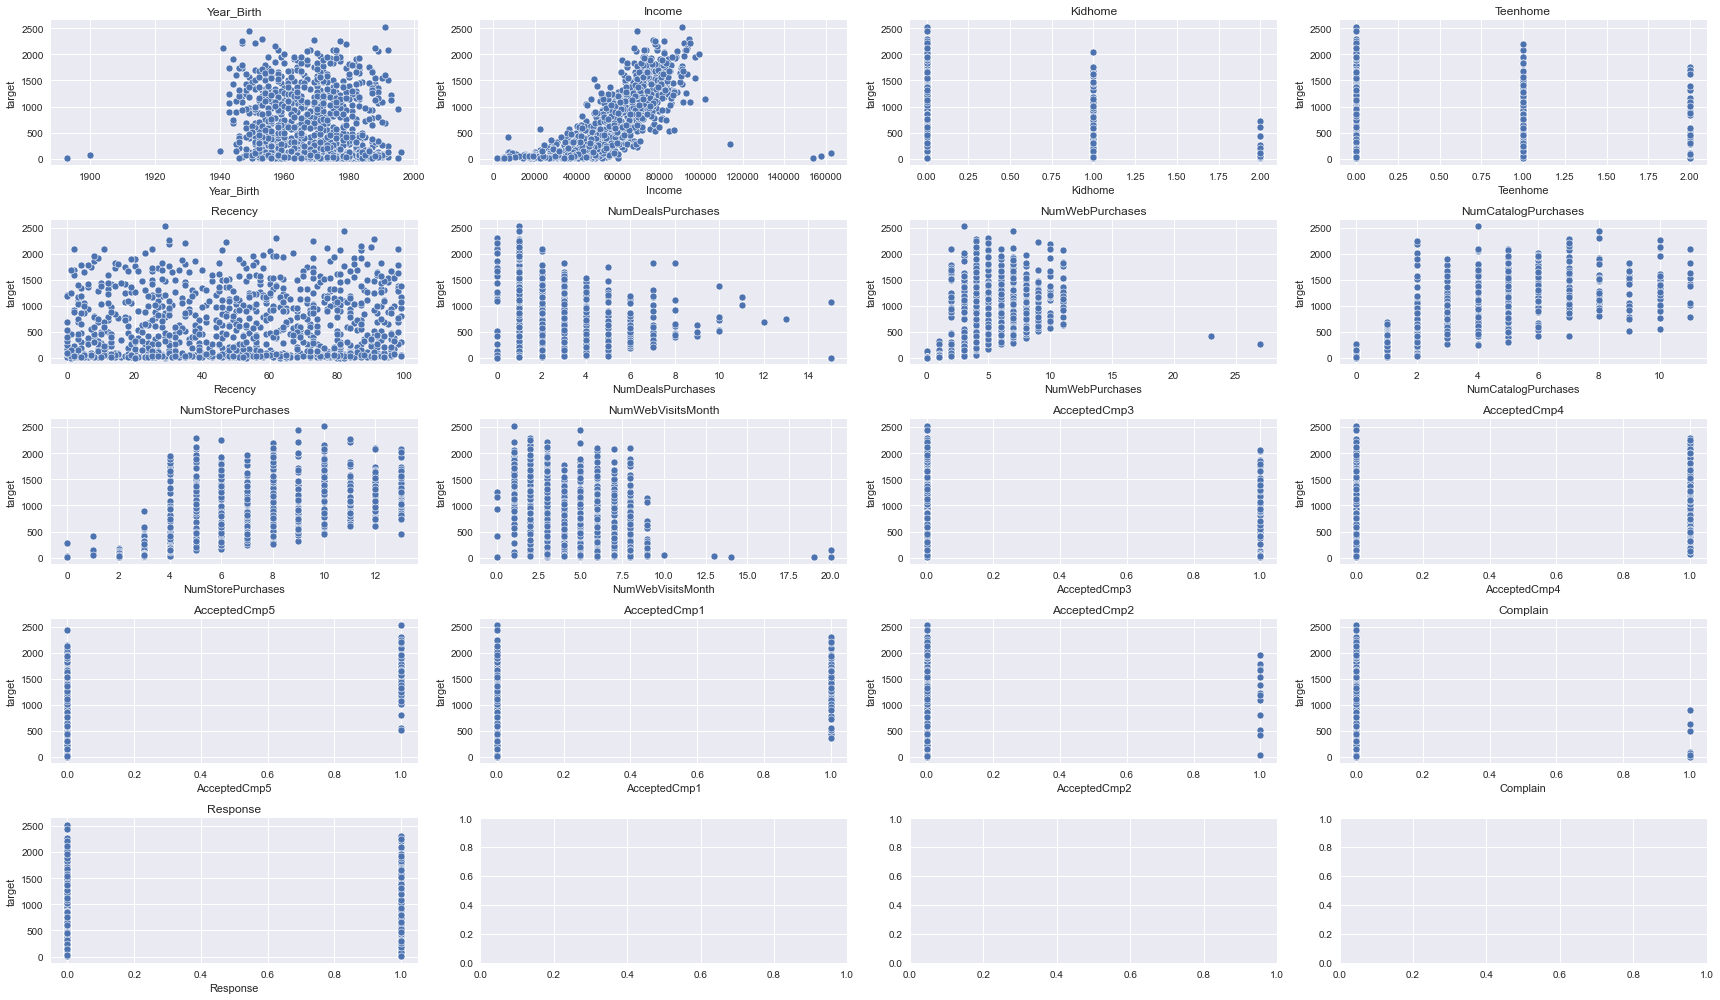

In [17]:
def show_dist_plot(df, columns):
    i = 0 
    plt.figure()
    plt.subplots(5,4,figsize=(24,14))
    for column in columns:
        i+=1
        plt.subplot(5,4,i)
        sns.scatterplot(df[column], df['target'])
        plt.title(f'{column}')
    plt.tight_layout()
    
show_dist_plot(train,num_cols)

<AxesSubplot:>

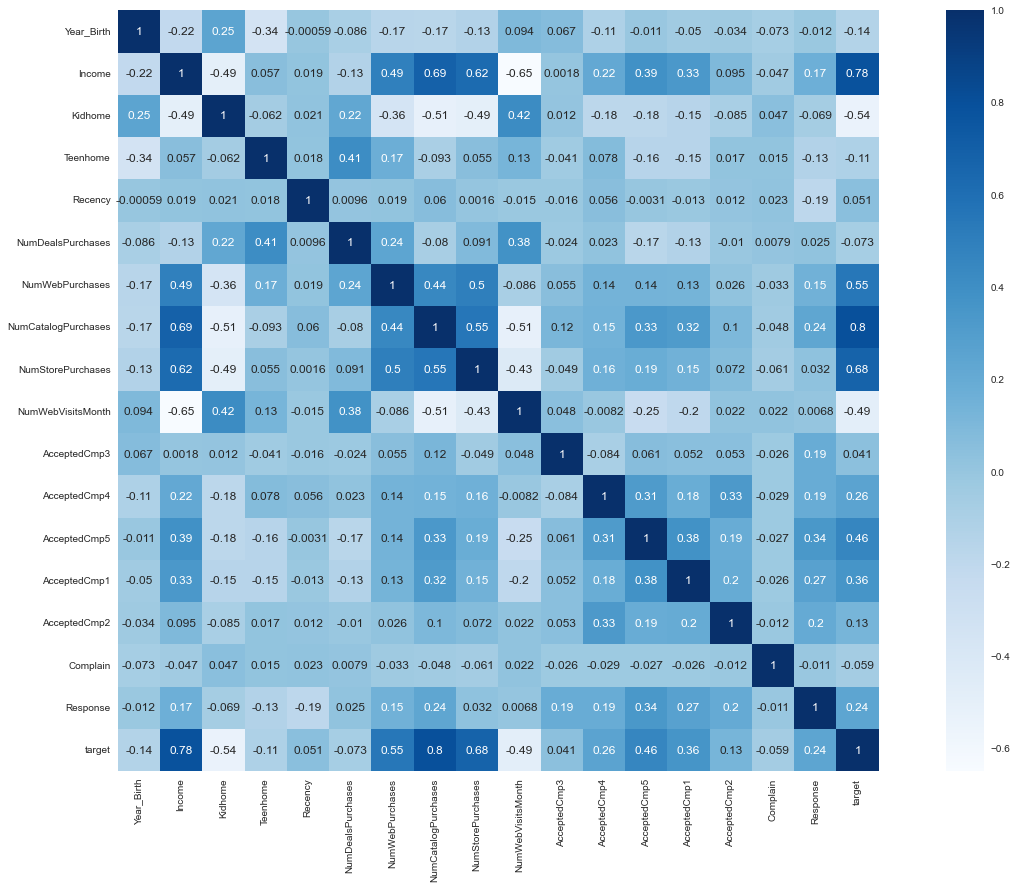

In [18]:
plt.figure(figsize=(24,14))
sns.heatmap(train.corr(),annot=True, square=True, annot_kws={'size':12},cmap='Blues')

# Feature Engineering

In [102]:
#Education
train['Education']=train['Education'].map({'Basic':1,'2n Cycle':2,'Graduation':3,
                       'PhD':4,'Master':5})
test['Education']=test['Education'].map({'Basic':1,'2n Cycle':2,'Graduation':3,
                       'PhD':4,'Master':5})
#Dt_Customer
train['Year_Customer']=train['Dt_Customer'].str.split('-',expand=True)[2].astype('int64')
test['Year_Customer']=test['Dt_Customer'].str.split('-',expand=True)[2].astype('int64')
train.drop('Dt_Customer',axis=1,inplace=True)
test.drop('Dt_Customer',axis=1,inplace=True)

#year_birth -> age : 상쇄

#total purhases
train['TotalPurchases']=train['NumCatalogPurchases']+train['NumStorePurchases']+train['NumWebPurchases']+train['NumDealsPurchases']
test['TotalPurchases']=test['NumCatalogPurchases']+test['NumStorePurchases']+test['NumWebPurchases']+test['NumDealsPurchases']

#kidhome+teenhome
train['Child']=train['Kidhome'] + train['Teenhome']
test['Child']=test['Kidhome'] + test['Teenhome']

#Martial_status
train['Marital_Status']=train['Marital_Status'].replace(['Divorced','Widow','YOLO','Alone','Absurd'],'Single')
test['Marital_Status']=train['Marital_Status'].replace(['Divorced','Widow','YOLO','Alone','Absurd'],'Single')

# Assumtion

## 학벌과 결혼유무에 따른 소득에 차이가 있을까?

<Figure size 576x396 with 0 Axes>

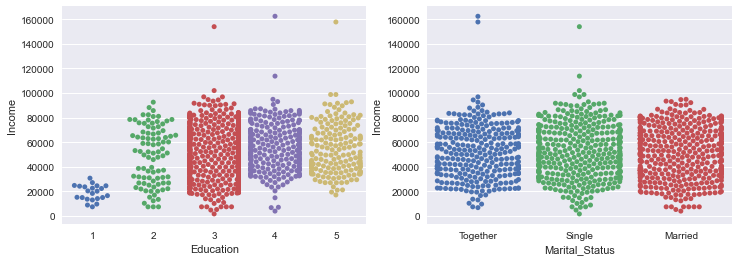

In [87]:
def show_swarmplot(df,columns):
    i = 0
    plt.figure()
    plt.subplots(1,2,figsize=(12,4))
    for column in columns:
        i+=1
        plt.subplot(1,2,i)
        sns.swarmplot(df[column],df['Income'])
    plt.show()
    
show_swarmplot(train,['Education','Marital_Status'])

---

In [88]:
num_cols = train.select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols = train.select_dtypes(exclude=['float64','int64']).columns.tolist()

<Figure size 576x396 with 0 Axes>

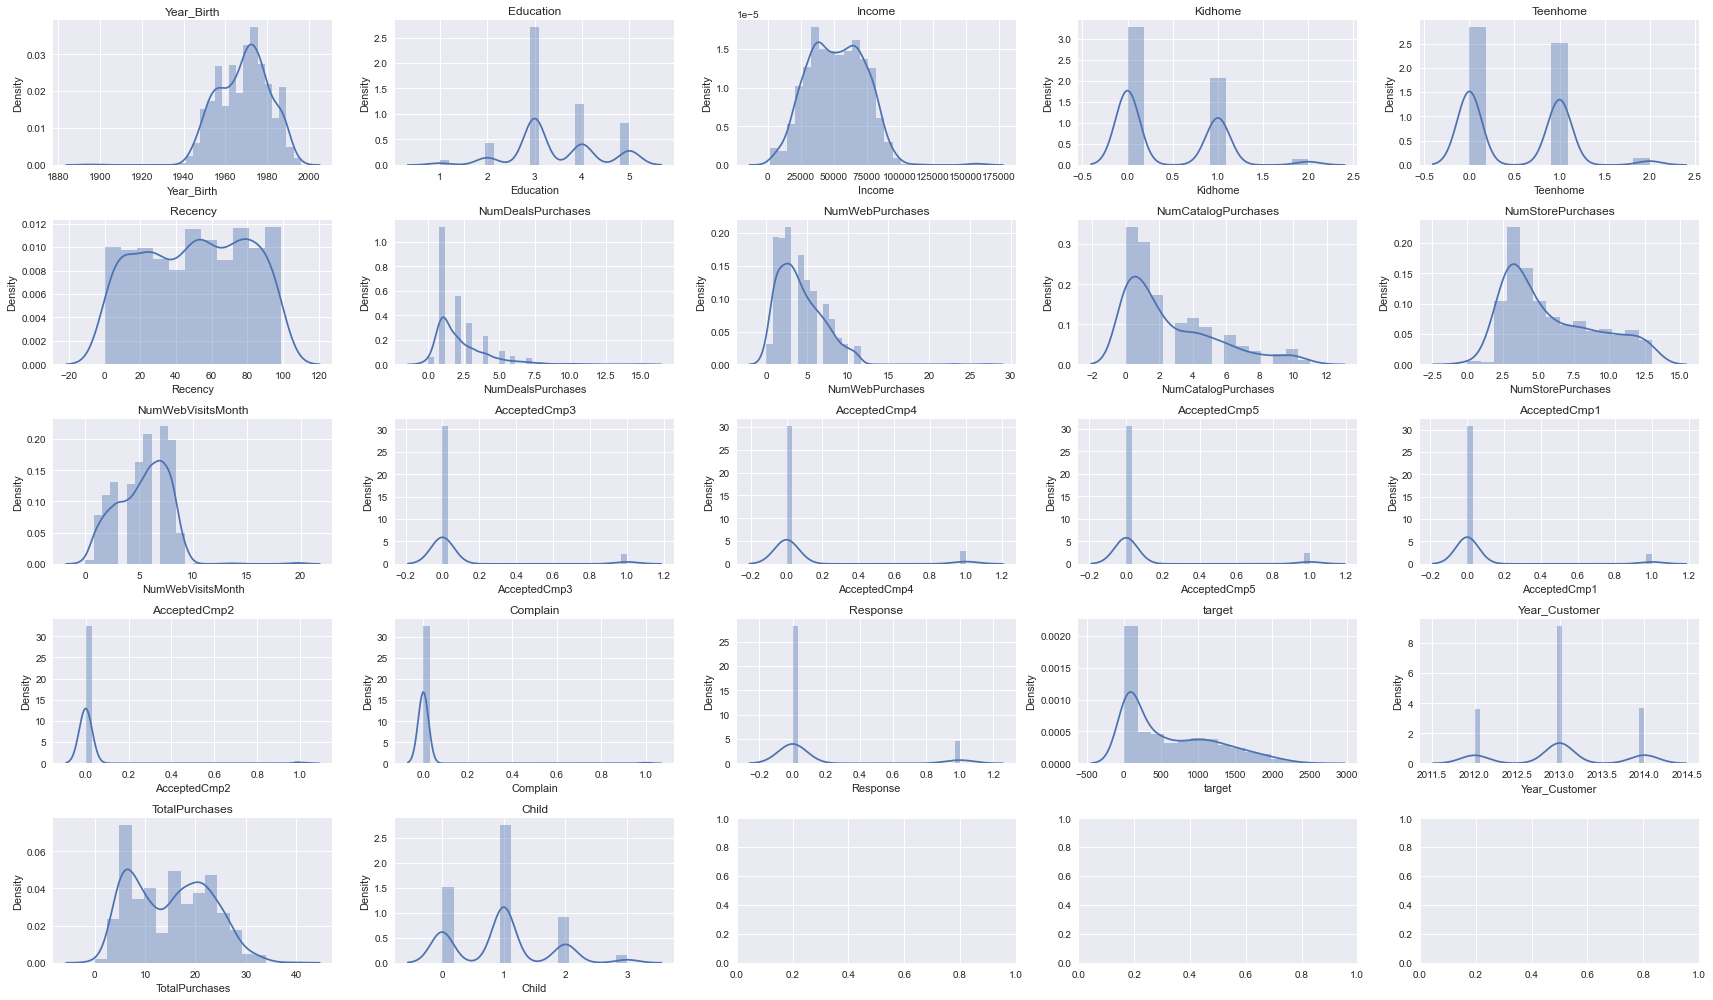

In [43]:
show_dist_plot(train,num_cols)

<AxesSubplot:>

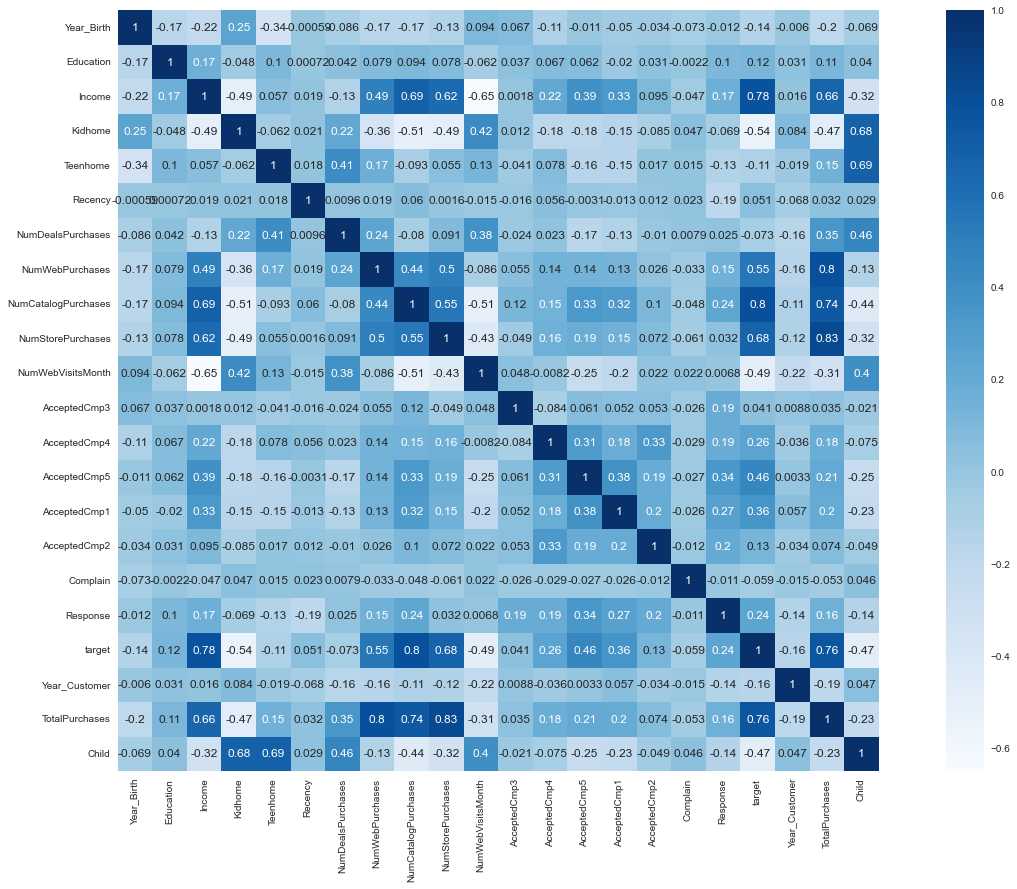

In [20]:
plt.figure(figsize=(24,14))
sns.heatmap(train.corr(),annot=True, square=True, annot_kws={'size':12},cmap='Blues')

# preprocessing

In [103]:
#drop outlier
from feature_engine.outliers import OutlierTrimmer
outliers = OutlierTrimmer(variables=['Year_Birth','Income'],fold=3)
train = outliers.fit_transform(train)

In [104]:
#target log
train['target']= np.log1p(train['target'])

#yeo
#totalpurchases

나중에 exp해주자.

In [105]:
#StandardScaler

ss=StandardScaler()
train[num_cols]=ss.fit_transform(train[num_cols])
test[num_cols]=ss.transform(test[num_cols])

In [106]:
#dummies
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Model

In [25]:
#Library
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

In [109]:
#model
X= train.drop(['target'],axis=1)
y= train['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state=42)

#trans
# trans=YeoJohnsonTransformer(variables=['Income'
# ])

# X_train=trans.fit_transform(X_train)
# X_test = trans.transform(X_test)


mse=[]
models=[RandomForestRegressor,SVR,KNeighborsRegressor,LGBMRegressor,XGBRegressor,ExtraTreesRegressor]
for i in models:
    reg=i()
    reg.fit(X_train,y_train)
    pred=reg.predict(X_test)
    mse.append(mean_squared_error(y_test,pred))
    
algorism=['rf_reg','KNN','svr','xgb_reg','lgbm_reg','extra_reg']

for i in algorism:
    if i=='rf_reg':
        rf_reg=RandomForestRegressor(random_state=42)
    elif i=='KNN':
        knn_reg=KNeighborsRegressor()
    elif i=='svr':
        svr=SVR(kernel='linear')
    elif i=='xgb_reg':
        xgb_reg=XGBRegressor(random_state=42)
    elif i=='extra_reg':
        extra_reg=ExtraTreesRegressor(random_state=42)
    else:
        lgbm_reg=LGBMRegressor(random_state=42)
        
vot_model=VotingRegressor(estimators=[('LGBoost',lgbm_reg),('XGBoost',xgb_reg),('EXTRA RF',extra_reg),('rf',rf_reg)])
vot_model.fit(X_train,y_train)
pred2=vot_model.predict(X_test)
mse.append(mean_squared_error(y_test,pred2))

mse_data=pd.DataFrame(mse,index=['RandomForestRegressor','SVR','KNeighborsRegressor','LGBMRegreessor','XGBRegressor','EXTRARegressor','Voting'],columns=['mse'])
mse_data

,mse
RandomForestRegressor,0.0834
SVR,2.2450
KNeighborsRegressor,0.1665
LGBMRegreessor,0.0934
XGBRegressor,0.1031
EXTRARegressor,0.0773
Voting,0.0758


# 다중공선성 확인

In [82]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                         for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor                  Feature
0       1.2888               Year_Birth
1       1.0987                Education
2       5.2909                   Income
3          inf                  Kidhome
4          inf                 Teenhome
5       1.1050                  Recency
6          inf        NumDealsPurchases
7          inf          NumWebPurchases
8          inf      NumCatalogPurchases
9          inf        NumStorePurchases
10      3.0617        NumWebVisitsMonth
11      1.0988             AcceptedCmp3
12      1.3955             AcceptedCmp4
13      1.5690             AcceptedCmp5
14      1.4185             AcceptedCmp1
15      1.2415             AcceptedCmp2
16      1.0340                 Complain
17      1.5553                 Response
18      1.2582            Year_Customer
19         inf           TotalPurchases
20         inf                    Child
21         inf   Marital_Status_Married
22         inf    Marital_Status_Single
23         inf  Marital_Status_Together


In [115]:
final_pred = vot_model.predict(test)
sample_submission['target'] = np.expm1(final_pred)
sample_submission.to_csv("/Users/bnj/Desktop/백남진/project/data/drive-download-20220502T013044Z-001/submision.csv",index=False)